In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn import datasets

In [1]:
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [11]:
abalone.columns = [
   "Sex",
     "Length",
   "Diameter",
     "Height",
    "Whole weight",
     "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"]

In [4]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
abalone.shape

(4177, 9)

In [13]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

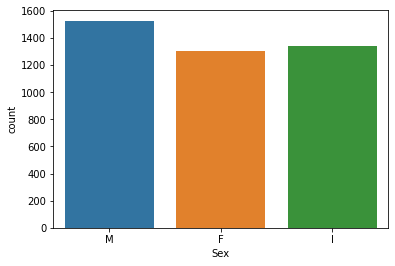

In [14]:
sns.countplot(x="Sex", data=abalone)

In [15]:
abalone=abalone.drop('Sex',1)

C:\Users\camil\AppData\Local\Temp/ipykernel_17680/4100494006.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  abalone=abalone.drop('Sex',1)


<AxesSubplot:xlabel='Rings', ylabel='Count'>

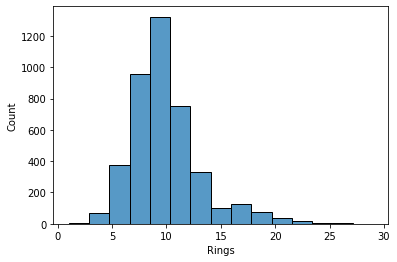

In [19]:
sns.histplot(x='Rings',bins=15,data=abalone)

In [20]:
correlation_matrix = abalone.corr()

In [21]:
correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [22]:
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

#### Posiblemente exista relación entre la edad y la medidas del abalote.

#### Divideremos los datos en entrenamiento y prueba

In [26]:
X = abalone.loc[:, abalone.columns != 'Rings']
y= abalone['Rings']

In [27]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=12345)

In [42]:
print (X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3341, 7) (836, 7) (3341,) (836,)


##### El en siguiente modelo KNN no cambiaremos las escalas 

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

In [128]:
rgr_knn_3=KNeighborsRegressor(n_neighbors=3)

In [129]:
rgr_knn_3.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [130]:
train_preds=rgr_knn_3.predict(X_train)

####  error de raíz cuadrática media (RMSE)

In [131]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE en los datos de entrenamiento es ',rmse)

RMSE en los datos de entrenamiento 1.6538366794859511


In [132]:
test_preds = rgr_knn_3.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE en los datos de prueba es ',rmse)

RMSE en los datos de prueba es  2.375417924000521


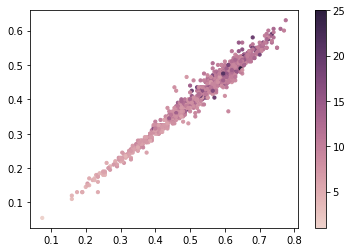

In [109]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter('Length','Diameter', c=y_test, s=10, cmap=cmap,data=X_test)
f.colorbar(points)
plt.show()

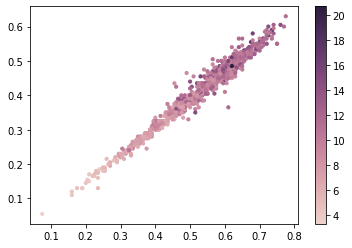

In [110]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter('Length','Diameter', c=test_preds, s=10, cmap=cmap,data=X_test)
f.colorbar(points)
plt.show() 

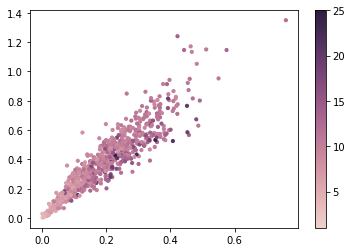

In [111]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter('Viscera weight','Shucked weight', c=y_test, s=10, cmap=cmap,data=X_test)
f.colorbar(points)
plt.show()

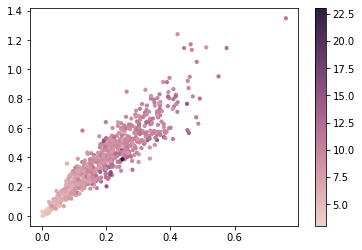

In [87]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter('Viscera weight','Shucked weight', c=test_preds, s=10, cmap=cmap,data=X_test)
f.colorbar(points)
plt.show() 

#### Ajuste del modelo KNN

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
params={'n_neighbors': range(1,50)}

In [114]:
grid_search_cv=GridSearchCV(KNeighborsRegressor(),params)

In [115]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [116]:
grid_search_cv.best_params_

{'n_neighbors': 25}

In [133]:
optimised_KNN=grid_search_cv.best_estimator_

In [137]:
y_train_predic=optimised_KNN.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_predic)
train_rmse = sqrt(train_mse)
print('RMSE en los datos de entrenamiento es ',train_rmse)

RMSE en los datos de entrenamiento es  2.0731180327543384


In [139]:
y_test_predic=optimised_KNN.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_predic)
test_rmse = sqrt(test_mse)
print('RMSE en los datos de prueba es ',test_rmse)

RMSE en los datos de prueba es  2.1700197339962175


#### Agregaremos el promedio ponderado de vecinos basados en la distancia

In [142]:
params={'n_neighbors': range(1,50), "weights": ["uniform", "distance"]}

In [143]:
grid_search_cv_P=GridSearchCV(KNeighborsRegressor(),params)

In [144]:
grid_search_cv_P.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [145]:
grid_search_cv_P.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [147]:
optimised_KNN_P=grid_search_cv_P.best_estimator_

In [148]:
y_test_predic=optimised_KNN_P.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_predic)
test_rmse = sqrt(test_mse)
print('RMSE en los datos de prueba es ',test_rmse)

RMSE en los datos de prueba es  2.1634265584947485


#### Embolsado en la regresion KNN

In [169]:
best_k=grid_search_cv_P.best_params_['n_neighbors']
best_weight=grid_search_cv_P.best_params_['weights']

In [170]:
bagged_knn = KNeighborsRegressor(n_neighbors=best_k,weights=best_weight)

In [171]:
from sklearn.ensemble import BaggingRegressor

In [172]:
Baggin_model=BaggingRegressor(bagged_knn,n_estimators=100)

In [173]:
Baggin_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [175]:
test_pred_grid=Baggin_model.predict(X_test)
test_mse=mean_squared_error(y_test,test_pred_grid)
test_rmse=sqrt(test_mse)
print('RMSE en los datos de prueba es ',test_rmse)

RMSE en los datos de prueba es  2.1641995069225057


###### Ref (https://realpython.com/knn-python/)

##### Ver modelo KNN de clasificacion en (https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)

##### Buscar Regresión logistica (https://realpython.com/logistic-regression-python/)